**1.** Libraries required

In [0]:
import numpy as np
from scipy import stats
import datetime
from scipy.spatial import distance
from sklearn.decomposition import PCA# Make an instance of the Model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.utils import shuffle
from math import sqrt
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy import ndimage

**2.** Class definition of KNN

In [0]:
class KNN:
    def __init__(self, k , num_classes):
        self.num_classes = num_classes
        self.k = k
        self.parameters = None
    
    def train(self, training_data, training_labels):
        """
        Train the classifier using the training data and training labels.
        Store whatever you think is neccessary in self.parameters.
        """
        self.parameters = []
        test_dataFrame=pd.DataFrame(training_data)
        test_dataFrame['label'] = training_labels
        self.parameters = np.array(test_dataFrame)
        self.parameters = self.parameters.reshape(len(training_data),1,-1)
        pass

    def predict(self, data):
        """
        Input should be a LIST of d-dimensional points.
        The return value should be a LIST of scalars between 1 and num_classes,
        indicating for each input point how it is classified.
        """
        # print(datetime.datetime.now())
        train_set_length = self.parameters.shape[0]
        train_labels = self.parameters[:,:,-1:].reshape(train_set_length,-1)
        trained_data = self.parameters[:,:,:-1].reshape(train_set_length,-1)
        test_data = data
        # print("before matrix mul")
        dists_matrix = np.sum(np.square(trained_data), axis=1)[:,np.newaxis] - 2 * trained_data.dot(test_data.T) + np.sum(np.square(test_data), axis=1)
        # print("after matrix mul")
        # print(datetime.datetime.now())
        sorted_k_neighbours = np.argsort(dists_matrix,axis=0)[:self.k,:]
        # print("after sorting")
        # print(datetime.datetime.now())
        sorted_class_list = []        
        sorted_class_list = [ [train_labels[sorted_k_neighbours[k_iter][data_iter]] for data_iter in range(0,len(data))] for k_iter in range(0,self.k)]
        result_list = np.array(sorted_class_list).reshape(self.k,-1)
        value, count = stats.mode(result_list, axis=0)
        # print(datetime.datetime.now())
        return value.reshape(len(data))
    
    def accuracy(self, data, labels):
        """
        Returns the proportion of correct classifications computed over data.
        """
        predicted_data = data
        error_count = 0
        total_count = len(predicted_data)
        for iterator in range(0,total_count-1):
          if predicted_data[iterator] != labels[iterator]:
            error_count = error_count + 1
        accur = (1 - (error_count/total_count)) * 100
        return accur

**3.** Functions definitions that will be required



In [0]:
#finds the p-norm distance bewtween two points
def vector_norm_distance(x_coor, y_coor, norm):
  return np.linalg.norm([x_coor, y_coor], norm)

#generates target for the provided dataset using the p-norm value passed
def generate_target(test_datasets,test_target, norm):
  for x_coord, y_coord in test_datasets:
    test_target = np.append( test_target, 1 if vector_norm_distance(x_coord, y_coord, norm ) <= 1 else 2)
  return test_target

def gen_normtarget(pnorm_value , data_set):
  synthetic_data_target = np.array([])
  synthetic_data_target = generate_target(data_set, synthetic_data_target, pnorm_value)
  return synthetic_data_target

#https://medium.com/python-pandemonium/data-visualization-in-python-scatter-plots-in-matplotlib-da90ac4c99f9
def plot_scatterplot(scatterplot_dataset,scatterplot_target):
  colorList=[]
  for items in scatterplot_target:
    if items == 1.0:
      colorList.append("red")
    else:
      colorList.append("blue")
  x_coordinates = scatterplot_dataset[:,:-1].reshape(961)
  y_coordinates = scatterplot_dataset[:,1:].reshape(961)
  plt.scatter(x_coordinates, y_coordinates, color=colorList);

def plot_contour(list_predicted):
  z_grid = np.array(list_predicted).reshape(310,310)
  X, Y = np.meshgrid(np.linspace(-1.5,1.5,z_grid.shape[1]),np.linspace(-1.5,1.5,z_grid.shape[0]))
  fig = plt.figure()
  ax1 = plt.contourf(X,Y,z_grid)
  plt.show()

#generate random list of values which is used to split the test data and validation data
def generate_randomList( len_of_randomList, startRange, endRange):
  len_of_generated_list = 0
  for i in range(2 * len_of_randomList):
    r=random.randint(startRange,endRange)
    if r not in random_list: 
      random_list.append(r)
      len_of_generated_list = len_of_generated_list + 1
    if len_of_generated_list >= len_of_randomList:
      break
values_Of_k_considered = [1 , 3, 5, 10, 13, 18, 27, 37, 47, 59, 65, 74, 89, 99]

**4.  (Q1. a)** Generation of Train and Test data-sets - points in the grid.


---
*  Train datasets are separated by 0.1 spacing between the points
*  Test datasets are separated by 0.01 spacing between the points


In [0]:
allpoints_inshape = np.linspace(-1.5,1.5,31)
synthetic_dataset = np.array([])
for x_coord in allpoints_inshape:
  for y_coord in allpoints_inshape:
    newdummy_array=[]
    newdummy_array.append(round(x_coord,1))
    newdummy_array.append(round(y_coord,1))
    synthetic_dataset = np.append( synthetic_dataset, np.array(newdummy_array) )
synthetic_dataset = synthetic_dataset.reshape(-1,2)

allpoints_inshape = np.linspace(-1.5,1.5,310)
synthetic_test_dataset = np.array([])
for x_coord in allpoints_inshape:
  for y_coord in allpoints_inshape:
    newdummy_array=[]
    newdummy_array.append(round(x_coord,2))
    newdummy_array.append(round(y_coord,2))
    synthetic_test_dataset = np.append( synthetic_test_dataset, np.array(newdummy_array) )
synthetic_test_dataset = synthetic_test_dataset.reshape(-1,2)

**5.** Generates the target labels based on 2-norm values (Q1.a)

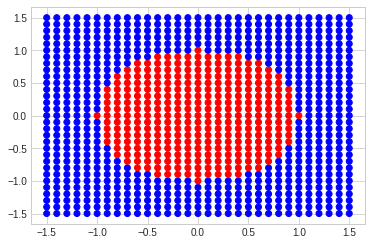

In [0]:
synthetic_data_target = gen_normtarget(2, synthetic_dataset)
synthetic_test_target = gen_normtarget(2 , synthetic_test_dataset)
plot_scatterplot(synthetic_dataset, synthetic_data_target)

**6. (Q1. d)** Generates the target labels based on 1-norm values (Q1.d)

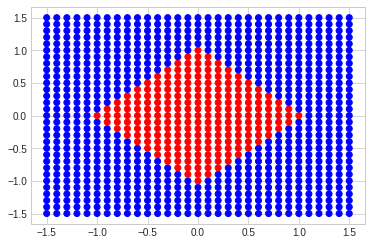

In [0]:
synthetic_data_target = gen_normtarget(1, synthetic_dataset)
plot_scatterplot(synthetic_dataset, synthetic_data_target)
synthetic_test_target = gen_normtarget(1 , synthetic_test_dataset)

**7. (Q1. e)** Generates the target labels based on 0.4-norm values (Q1.e)

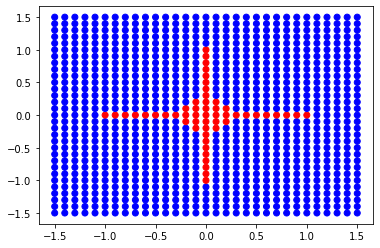

In [7]:
synthetic_data_target = gen_normtarget(0.4, synthetic_dataset)
plot_scatterplot(synthetic_dataset, synthetic_data_target)
synthetic_test_target = gen_normtarget(0.4, synthetic_test_dataset)

**8. (Q1. c)** Runs the KNN classifier with the provided train and test dataset for the synthetic data and plots the contour plot.


Observation of K in contour plots


---



*   As the value of K increases more than 10, for all three cases of the p-norm values, the accuracy decreases
*   For the 0.4 norm value, as the number of datasets in a class 1 is significantly lesser than the other, after values of K to be 50 the model classifies all the values to be class 2.
*   Optimal performance is achieved with smaller values of k and with variation in k, there is a significant change in the prediction of the classes.
* For 2D dataset as in our case, euclidean distance works the best and when the dimensions increases, the euclidean distance will increase leading to the problem of curse of dimensionality.
[References](https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d)


**Note: To run the classifier for Q1.d and Q1.e, run the respective target generation cells**




1
97.35691987513007


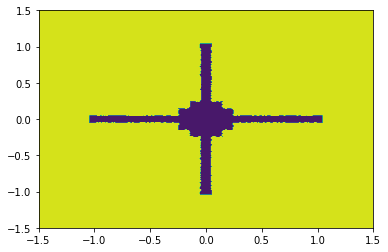

3
97.7471383975026


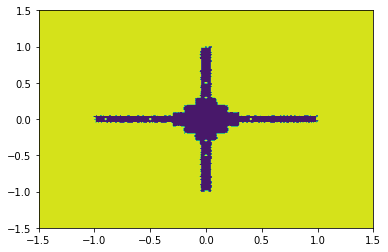

5
97.94068678459938


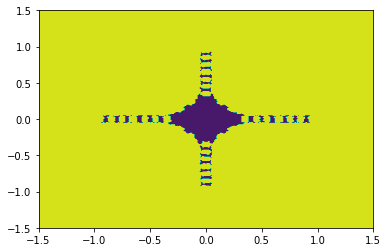

10
98.34131113423517


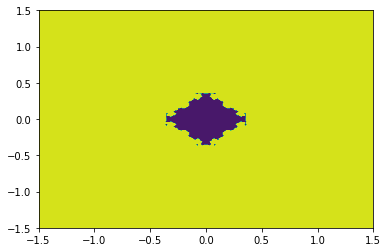

13
98.18106139438085


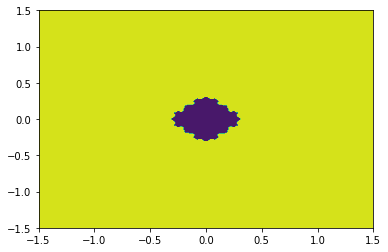

18
98.16024973985432


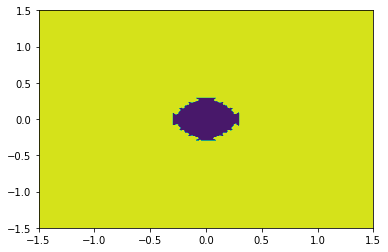

27
97.67117585848075


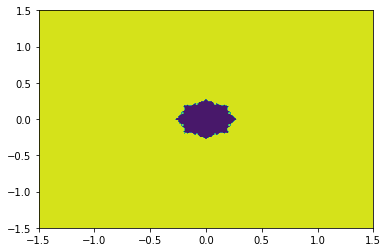

37
97.45057232049949


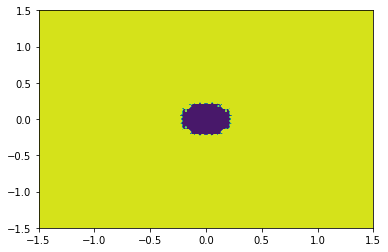

47
96.93964620187305


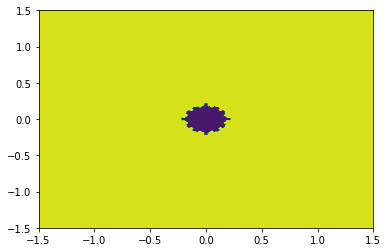

59
95.58792924037462


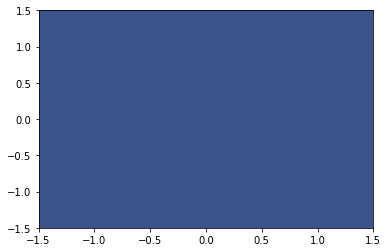

65
95.58792924037462


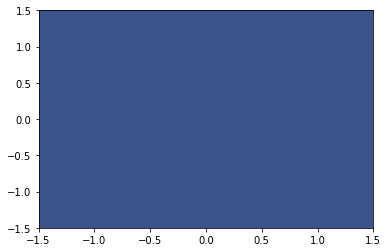

74
95.58792924037462


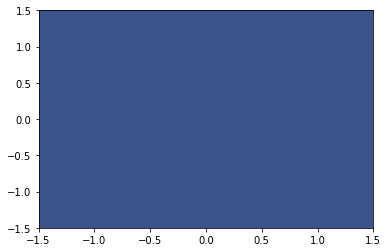

89
95.58792924037462


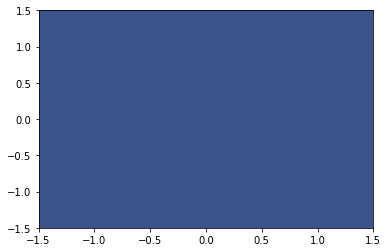

99
95.58792924037462


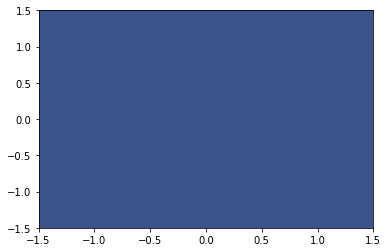

In [10]:
for k_iterator in values_Of_k_considered:
  myClassifier = KNN(k=k_iterator, num_classes=2)
  myClassifier.train(synthetic_dataset, synthetic_data_target)
  predicted_list = myClassifier.predict(synthetic_test_dataset)
  print(k_iterator)  
  accur = myClassifier.accuracy(predicted_list,synthetic_test_target)
  print(accur)
  plot_contour(predicted_list)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**9. (Q2. a)** Reads the MNIST data from the drive

In [0]:
file_path = '/content/drive/My Drive/MNIST_DATA/'
test_df = pd.read_csv(file_path + 'mnist_test.csv')
train_df = pd.read_csv(file_path + 'mnist_train.csv')

In [0]:
mnist_train_label = np.array(train_df['5'],np.float32)
mnist_train_dataset = np.array(train_df.drop('5',axis=1),np.float32)
mnist_test_label = np.array(test_df['7'],np.float32)
mnist_test_dataset = np.array(test_df.drop('7',axis=1),np.float32)
train_accuracy_map = {}
test_accuracy_map = {}

**10.** Generates a 10,000 random sets of data from the train data-set to find the classfication accuracy of the model

In [0]:
random_list=[]
mnist_train_predict_dataset = np.array([])
mnist_train_predict_label = np.array([])
generate_randomList( 10000 , 0, 59998)
for iterator in random_list:
  mnist_train_predict_dataset = np.append( mnist_train_predict_dataset, mnist_train_dataset[iterator])
  mnist_train_predict_label = np.append(mnist_train_predict_label, mnist_train_label[iterator])
mnist_train_predict_dataset = mnist_train_predict_dataset.reshape(10000,-1)

**11.** Runs the KNN classifier for the MNIST train set and the random data-set generated is considered as the test dataset

Average time taken to run on colab -> 100 secs

In [15]:
for each_k in values_Of_k_considered:
  mnist_Classifier = KNN(k=each_k, num_classes=10)
  mnist_Classifier.train(mnist_train_dataset, mnist_train_label)
  mnist_predicted_list = mnist_Classifier.predict(mnist_train_predict_dataset)
  print(each_k)
  accur = mnist_Classifier.accuracy(mnist_predicted_list,mnist_train_predict_label)
  train_accuracy_map[each_k] = accur
  print(accur)

1
100.0
3
98.69
5
98.16
10
97.59
13
97.31
18
96.96000000000001
27
96.44
37
96.12
47
95.69
59
95.36
65
95.25
74
95.05
89
94.69999999999999
99
94.41000000000001


**12.** Runs the KNN classifier for the MNIST train and MNIST test datasets provided

Average time taken to run on colab -> 90 secs

In [16]:
for each_k in values_Of_k_considered:
  mnist_Classifier = KNN(k=each_k, num_classes=10)
  mnist_Classifier.train(mnist_train_dataset, mnist_train_label)
  mnist_predicted_list = mnist_Classifier.predict(mnist_test_dataset)
  print(each_k)
  accur = mnist_Classifier.accuracy(mnist_predicted_list,mnist_test_label)
  test_accuracy_map[each_k] = accur
  print(accur)

1
96.9096909690969
3
97.04970497049705
5
96.87968796879687
10
96.64966496649666
13
96.52965296529653
18
96.32963296329633
27
96.03960396039604
37
95.7095709570957
47
95.41954195419542
59
95.12951295129513
65
94.96949694969497
74
94.8094809480948
89
94.50945094509451
99
94.41944194419442


In [17]:
print(test_accuracy_map)
print(train_accuracy_map)

{1: 96.9096909690969, 3: 97.04970497049705, 5: 96.87968796879687, 10: 96.64966496649666, 13: 96.52965296529653, 18: 96.32963296329633, 27: 96.03960396039604, 37: 95.7095709570957, 47: 95.41954195419542, 59: 95.12951295129513, 65: 94.96949694969497, 74: 94.8094809480948, 89: 94.50945094509451, 99: 94.41944194419442}
{1: 100.0, 3: 98.69, 5: 98.16, 10: 97.59, 13: 97.31, 18: 96.96000000000001, 27: 96.44, 37: 96.12, 47: 95.69, 59: 95.36, 65: 95.25, 74: 95.05, 89: 94.69999999999999, 99: 94.41000000000001}


**13.** Plots the classification accuracy for the train and test datasets for different values of k

Optimal performance is achieved for the value of k to be 3

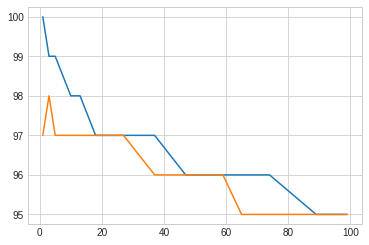

In [18]:
train_values=[]
train_keys=[]
for keys , values in train_accuracy_map.items():
  train_values.append(int(math.ceil(values)))
  train_keys.append(keys)
test_values=[]
test_keys=[]
for keys , values in test_accuracy_map.items():
  test_values.append(int(math.ceil(values)))
  test_keys.append(keys)

plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
#train_values = train_accuracy_map.values
ax.plot( train_keys , train_values)
ax.plot( test_keys , test_values)

**14. (Q2. b)** Dataset size considered are 500, 5000, 25000, 50000.


In [0]:
train_accuracy_map = {}
test_accuracy_map = {}
for train_sample_size in [500, 5000, 25000]:
  random_list=[]
  mnist_train_random_label = np.array([])
  mnist_train_random_dataset = np.array([])
  generate_randomList( train_sample_size , 0, 59998)
  for iterator in random_list:
    mnist_train_random_dataset = np.append( mnist_train_random_dataset, mnist_train_dataset[iterator])
    mnist_train_random_label = np.append(mnist_train_random_label, mnist_train_label[iterator])
  mnist_train_random_dataset = mnist_train_random_dataset.reshape(train_sample_size,-1)
  ##
  mnist_Classifier = KNN(k=3, num_classes=10)
  print(train_sample_size)
  mnist_Classifier.train(mnist_train_random_dataset, mnist_train_random_label)
  mnist_predicted_list = mnist_Classifier.predict(mnist_train_predict_dataset)
  accur = mnist_Classifier.accuracy(mnist_predicted_list,mnist_train_predict_label)
  train_accuracy_map[train_sample_size] = accur
  print("Train accuracy-> " +str(accur))
  mnist_predicted_list = mnist_Classifier.predict(mnist_test_dataset)
  accur = mnist_Classifier.accuracy(mnist_predicted_list,mnist_test_label)
  test_accuracy_map[train_sample_size] = accur
  print("Test accuracy-> " +str(accur))

**15.** Classification accuracy for different train sizes

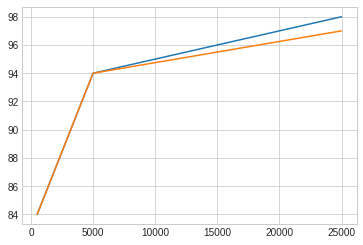

In [0]:
train_values=[]
train_keys=[]
for keys , values in train_accuracy_map.items():
  train_values.append(int(math.ceil(values)))
  train_keys.append(keys)
test_values=[]
test_keys=[]
for keys , values in test_accuracy_map.items():
  test_values.append(int(math.ceil(values)))
  test_keys.append(keys)

plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot( train_keys , train_values)
ax.plot( test_keys , test_values)

**16. (Q2. c)** Image resolution reduction is done using PCA.

Observation

---


1.  On reduction, the number of columns were reduced from 784 to 154, thereby reducing the resolution of the images
2.  Running KNN classfier for the reduced resolution increased the accuracy of the model by a few percentage and had a decrease in the time of execution of about 20 secs (around 10% faster)




In [20]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(.95)
pca.fit(mnist_train_dataset)
mnist_train_dataset = pca.transform(mnist_train_dataset)
mnist_test_dataset = pca.transform(mnist_test_dataset)
mnist_train_dataset.shape

(59999, 154)

**17.** Classification accuracy after reducing the resolution

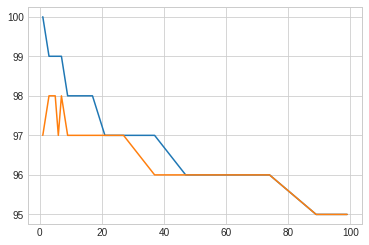

In [0]:
train_values=[]
train_keys=[]
for keys , values in train_accuracy_map.items():
  train_values.append(int(math.ceil(values)))
  train_keys.append(keys)
test_values=[]
test_keys=[]
for keys , values in test_accuracy_map.items():
  test_values.append(int(math.ceil(values)))
  test_keys.append(keys)

plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot( train_keys , train_values)
ax.plot( test_keys , test_values)

**18. (Q3. a)**

To find E(Z) and Var(Z), where 
\begin{equation} Z = (X-Y)^2  \end{equation}

For continous random variables, \begin{equation} E(X) = \int_{-\infty}^\infty   x. p(x) dx \end{equation}

For uniform distribution, \begin{equation} p(x) = 1/b-a \end{equation}

Therefore, \begin{equation} E(Z) = \int_{0}^1 \int_{0}^1  (x-y)^2 p(x)p(y) dx dy \end{equation}

Substituting pdf to be 1 and solving the equation gives E(Z).

For Var(Z),

\begin{equation} Var(X) = E(X^2) - E(X)^2  \end{equation}






In [0]:
expectation_of_z, errx  = dblquad(lambda x, y: pow((x-y),2), 0, 1, 0, 1)
expectation_of_z2, errx2 = dblquad(lambda x, y: pow((x-y),4), 0, 1, 0, 1)
variance_of_z = expectation_of_z2 - pow(expectation_of_z,2)
print("Expectation of Z - " + str(expectation_of_z))
print("Variance of Z - " + str(varx))

Expectation of Z - 0.16666666666666666
Variance of Z - 0.03888888888888889


**19. (Q3. b)**

To find the expectation and variance for d-dimensions, I'm condisering 3 dimensions.

\begin{equation} X = (X_{1} + X_{2} + X_{3}) \end{equation}

\begin{equation} R = (Z_{1} + Z_{2} + Z_{3} ) \end{equation}

Therefore E(R) =>

\begin{equation} E(R) = E(Z_{1} + Z_{2} + Z_{3} )\end{equation}

\begin{equation} E(Z_{1} + Z_{2} + Z_{3} ) =  E(Z_{1}) +  E(Z_{2}) + E(Z_{3})  \end{equation}


The expected value of the euclidean distance in 3D is thrice the value of the expected value of the euclidean distance in 1d. 

This proves that, as the dimensions increases the euclidean distance between any two random variables will increase.

In [0]:
expectation_of_r = expectation_of_z * 3
variance_of_r = variance_of_z * 3
print("Expectation of R - " + str(expectation_of_R))
print("Variance of R - " + str(variance_of_r))

Expectation of R - 0.5
Variance of R - 0.11666666666666667


**20. (Q4. a)** Decision Tree classifier on the synthetic datasets generated for 0.4, 1, 2 ,and 3 norms

In [0]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
def run_decision_treeClassifier( X_train , X_test, y_train, y_test):
  clf = DecisionTreeClassifier()
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
synthetic_data_target = gen_normtarget(0.4, synthetic_dataset)
X_train1, X_test1, y_train1, y_test1 = train_test_split(synthetic_dataset, synthetic_data_target, test_size=0.3, random_state=1) # 70% training and 30% test
run_decision_treeClassifier( X_train1 , X_test1, y_train1, y_test1)

synthetic_data_target = gen_normtarget(1, synthetic_dataset)
X_train2, X_test2, y_train2, y_test2 = train_test_split(synthetic_dataset, synthetic_data_target, test_size=0.3, random_state=1) # 70% training and 30% test
run_decision_treeClassifier( X_train2 , X_test2 , y_train2, y_test2)

synthetic_data_target = gen_normtarget(2, synthetic_dataset)
X_train3, X_test3, y_train3, y_test3 = train_test_split(synthetic_dataset, synthetic_data_target, test_size=0.3, random_state=1) # 70% training and 30% test
run_decision_treeClassifier( X_train3 , X_test3 , y_train3, y_test3)

synthetic_data_target = gen_normtarget(3, synthetic_dataset)
X_train4, X_test4, y_train4, y_test4 = train_test_split(synthetic_dataset, synthetic_data_target, test_size=0.3, random_state=1) # 70% training and 30% test
run_decision_treeClassifier( X_train4 , X_test4 , y_train4, y_test4)

Accuracy: 0.9792387543252595
Accuracy: 0.9550173010380623
Accuracy: 0.972318339100346
Accuracy: 0.9757785467128027


**21. (Q4. b)**

*   Splits the data based on the provided split ratio.
*   Finds all the classes in the data-set and from the split ratio, randomnly selects the required number of rows from each class



In [0]:
def custom_mnist_test_train_split( train_df , split_ratio ):
  unique_classes_list = train_df['5'].unique()
  final_train_df = pd.DataFrame()
  final_validation_df = pd.DataFrame()
  for class_iter in unique_classes_list:
    temp_df = train_df.loc[train_df['5'] == class_iter ]
    index = temp_df.index
    temp_df = shuffle(temp_df)
    temp_df.index = index
    total_rows_count = temp_df.shape[0]
    number_of_rows_selected = int(total_rows_count * split_ratio)
    final_train_df = final_train_df.append(temp_df[: number_of_rows_selected])
    final_validation_df = final_validation_df.append(temp_df[number_of_rows_selected:])
  return np.array(final_train_df.drop('5',axis=1)) , np.array(final_train_df['5']), np.array(final_validation_df.drop('5',axis=1)), np.array(final_validation_df['5'])

In [0]:
mnist_split_train_dataset , mnist_split_train_label, mnist_split_validation_dataset, mnist_split_validation_label = custom_mnist_test_train_split( train_df , 0.8)

**22.** Meta-parameters decisions and Observations:


---

* max_depth -> for small values of max-depth the classifier performs poorly. As the number of features and datasets available are more, it is required for the classifier to have atleast 10 levels of depth for optimal performance and changing the value beyond 20 has minimal to zero effects on the classifier
* criterion -> default being 'gini' and used to find the impurity in the node. Generally changing this to 'entropy' has a slight increase in the accuracy of the model (around 0.4% - 0.5%)
* max_features -> the default being m = p, but considering the value to be anything more than 500 gives the same performace. This might be because all the data is available in the center pixels and most of the times the surrounding pixels are empty. Minimising this to 500 gives the same accuracy with decreased run times
* splitter -> default being 'best' -> takes considerably more time since the best split is choosen rather than the random. But 'random' performs way faster than the best option but the accuracy gets deteriorated by around 1%. 

[Decision Tree meta-parameters](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d)

In [0]:
for max_dept_iter in [5,10,13,15,20,25]:
  clf = DecisionTreeClassifier(max_depth=max_dept_iter, criterion='entropy' , max_features=520 , splitter='random')
  clf = clf.fit(mnist_split_train_dataset,mnist_split_train_label)
  y_pred = clf.predict(mnist_split_validation_dataset)
  print("Depth:" +str(max_dept_iter)+ " Accuracy validation:",metrics.accuracy_score(mnist_split_validation_label, y_pred))
  test_pred = clf.predict(mnist_test_dataset)
  print("Depth:" +str(max_dept_iter)+ " Accuracy test:",metrics.accuracy_score(mnist_test_label, test_pred))

Depth:5 Accuracy validation: 0.6581139620126625
Depth:5 Accuracy test: 0.662966296629663
Depth:10 Accuracy validation: 0.8356381206264578
Depth:10 Accuracy test: 0.844984498449845
Depth:13 Accuracy validation: 0.8551316227924025
Depth:13 Accuracy test: 0.8642864286428643
Depth:15 Accuracy validation: 0.8647117627457515
Depth:15 Accuracy test: 0.8762876287628762
Depth:20 Accuracy validation: 0.871626124625125
Depth:20 Accuracy test: 0.872987298729873
Depth:25 Accuracy validation: 0.8684605131622792
Depth:25 Accuracy test: 0.8717871787178718
